<a href="https://colab.research.google.com/github/hanocha/try-tensorflow/blob/master/2019_12_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

g = tf.Graph()

with g.as_default():
  x = tf.placeholder(dtype=tf.float32, shape=(None), name='x')
  w = tf.Variable(2.0, name='weight')
  b = tf.Variable(0.7, name='bias')

  z = w * x + b

  init = tf.global_variables_initializer()


with tf.Session(graph=g) as sess:
  sess.run(init)

  for t in [1.0, 0.6, -1.8]:
    print('x=%4.1f --> z=%4.1f' % (t, sess.run(z, feed_dict={x:t})))

x= 1.0 --> z= 2.7
x= 0.6 --> z= 1.9
x=-1.8 --> z=-2.9


In [3]:
import tensorflow as tf
import numpy as np

g = tf.Graph()

with g.as_default():
  x = tf.placeholder(dtype=tf.float32, shape=(None, 2, 3), name='input_x')
  x2 = tf.reshape(x, shape=(-1, 6), name='x2')
  xsum = tf.reduce_sum(x2, axis=0, name='col_sum')
  xmean = tf.reduce_mean(x2, axis=0, name='col_mean')

  with tf.Session(graph=g) as sess:
    x_array = np.arange(18).reshape(3,2,3)
    print('input shape: ', x_array.shape)
    print('Reshaped: \n', sess.run(x2, feed_dict={x: x_array}))
    print('Column Sums: \n', sess.run(xsum, feed_dict={x: x_array}))
    print('Column means: \n', sess.run(xmean, feed_dict={x: x_array}))

input shape:  (3, 2, 3)
Reshaped: 
 [[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]]
Column Sums: 
 [18. 21. 24. 27. 30. 33.]
Column means: 
 [ 6.  7.  8.  9. 10. 11.]


In [17]:
class TfLinreg(object):
  def __init__(self, x_dim, learning_rate=0.01, random_seed=None):
    self.x_dim = x_dim
    self.learning_rate = learning_rate
    self.g = tf.Graph()

    with self.g.as_default():
      tf.set_random_seed(random_seed)

      self.build()

      self.init_op = tf.global_variables_initializer()

  def build(self):
    self.X = tf.placeholder(dtype=tf.float32,
                            shape=(None, self.x_dim),
                            name='x_input')
    
    self.y = tf.placeholder(dtype=tf.float32,
                            shape=(None),
                            name='y_input')
    
    print(self.X)
    print(self.y)

    w = tf.Variable(tf.zeros(shape=(1)), name='weight')
    b = tf.Variable(tf.zeros(shape=(1)), name='bias')
    print(w)
    print(b)

    self.z_net = tf.squeeze(w * self.X + b, name='z_net')
    print(self.z_net)

    sqr_errors = tf.square(self.y - self.z_net, name='sqr_errors')
    print(sqr_errors)

    self.mean_cost = tf.reduce_mean(sqr_errors, name='mean_cost')

    optimizer = tf.train.GradientDescentOptimizer(
      learning_rate=self.learning_rate,
      name='GradientDescent'
    )

    self.optimizer = optimizer.minimize(self.mean_cost)


X_train = np.arange(10).reshape((10,1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

print(X_train.shape)

lrmodel = TfLinreg(x_dim=X_train.shape[1], learning_rate=0.01)

(10, 1)
Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_errors:0", dtype=float32)


range(1, 11)
[32.431, 6.0113096, 1.446125, 0.65659344, 0.5193632, 0.4948352, 0.48978764, 0.48811454, 0.48703355, 0.48606348]


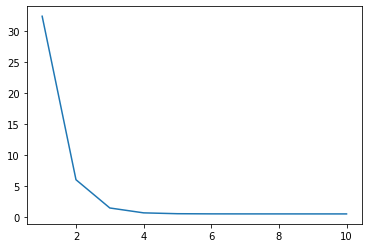

In [24]:
import matplotlib.pyplot as plt

def train_linreg(sess, model, X_train, y_train, num_epochs=10):
  sess.run(model.init_op)
  training_costs = []
  for i in range(num_epochs):
    _, cost = sess.run([model.optimizer, model.mean_cost], feed_dict={model.X:X_train, model.y:y_train})
    training_costs.append(cost)

  return training_costs

sess = tf.Session(graph=lrmodel.g)
training_costs = train_linreg(sess, lrmodel, X_train, y_train)

print(range(1, len(training_costs) + 1))
print(training_costs)

plt.plot(range(1, len(training_costs) + 1), training_costs)
plt.show()